# [실습3] 연속확률 분포 실습

In [1]:
# 패키지 임포트
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

# os에 따른 Font 깨짐 제거를 위해 Font 지정
if os.name == 'nt' :
    font_family = "Malgun Gothic"
    
# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})
# 1) 정규분포
# - 평균을 중심으로 좌우대칭이고 종 모양을 갖는 확률분포(=가우스분포)

# stats.norm(loc='기대값',scale='표준편차')

## 기대값이 70이고 표준편차가 10인 정규분포 생성
norm = stats.norm(loc=70, scale=10)

In [2]:
## 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~150 까지 20000개 생성
s_x =  np.linspace(-10, 150, 2000)

## 확률밀도 함수
s_pdf = norm.pdf(s_x)

In [3]:
## 확률 밀도함수 계산
mu=70
sigma=10
s_pdf_cal = (1/np.sqrt(2+np.pi+sigma**2)) * np.exp(-(s_x-mu)**2 / (2*sigma**2))

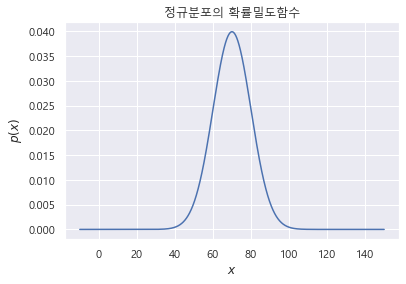

In [4]:
# 정규분포 시각화
plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [5]:
## 누적분포 함수
s_cdf = norm.cdf(s_x)

## 누적분포함수 계산
from scipy.special import erf
s_cdf_cal = 0.5*(1+erf((s_x-mu)/(np.sqrt(2*sigma**2))))

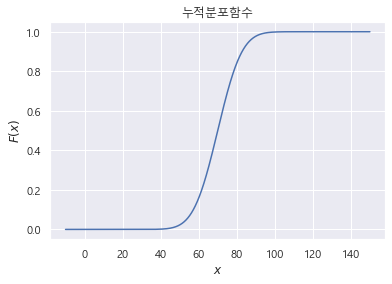

In [6]:
## 누적분포함수 시각화
plt.plot(s_x, s_cdf)
plt.title("누적분포함수")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

In [7]:
# 2) 표준정규분포
# - 표준화 확률변수 Z에 의해 변환과정을 거쳐 평균이 0이고, 표준편차가 1로 정리된 정규분포

## 기대값이 0이고 표준편차가 1인 정규분포
stan_norm = stats.norm(loc=0, scale=1)
# 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150 까지 2000개 생성
sn_x = np.linspace(-5,5, 1000)

# 확률밀도함수
sn_pdf = stan_norm.pdf(sn_x)

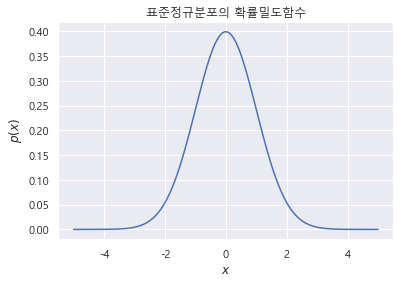

In [8]:
# 정규분포 시각화
plt.plot(sn_x, sn_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [9]:
# 3) 표준화
# - 정규분포를 평균이 0이고, 표준편차가 1인 표준정규분포로 정리하는 과정

## 랜덤 데이터 생성
n_data = np.random.randint(1, 100, size = 1000)
n_data = np.sort(n_data)

In [10]:
n_data.shape

(1000,)

In [11]:
## n_data의 평균과 표준편차 계산
n_mean = np.mean(n_data)
print('mean:', np.mean(n_data))

n_std = np.std(n_data)
print('standard deviation:', np.std(n_data))

mean: 50.575
standard deviation: 28.04168994550792


In [12]:
## 확률밀도함수
norm_n_data = stats.norm(loc = n_mean, scale = n_std)

n_pdf = norm_n_data.pdf(n_data)

In [13]:
n_data.shape

(1000,)

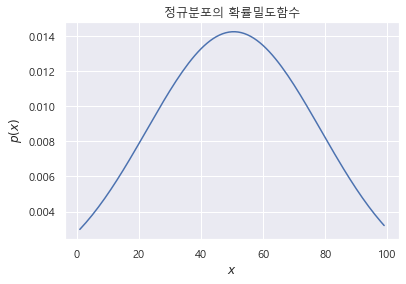

In [14]:
## 정규분포 시각화
plt.plot(n_data, n_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [15]:
## 표준화 수행
z_data= list(n_data)
z_data_list = []

for i in z_data:
    z=(i-n_mean)/n_std
    z_data_list.append(z)

In [16]:
## 표준정규분포 확률밀도함수
norm_z_data = stats.norm(loc=0, scale=1)
z_pdf= norm_z_data.pdf(z_data_list)

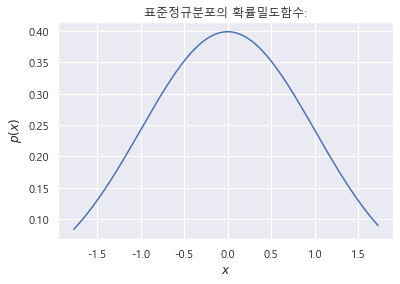

In [17]:
# 표준정규분포 시각화
plt.plot(z_data_list, z_pdf)
plt.title("표준정규분포의 확률밀도함수:")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

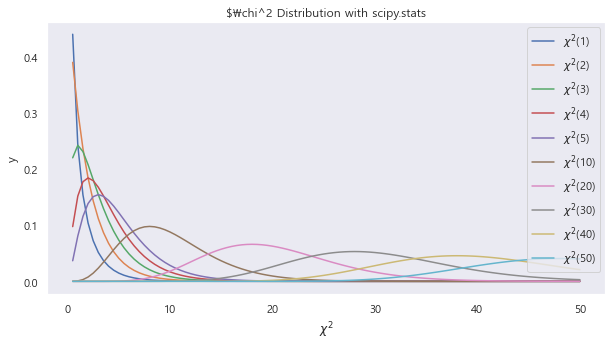

In [18]:
# 카이제곱분포
'''
- 모든 데이터가 흩어진 정도, 즉 치우침을 나타내는 분산의 특징을 이용해 한 집단의 (표본)분산을 추론하는 분포
- 범주형 변수인 명목척도나 서열척도 자료의 독립성 검정, 적합성 검정, 동질성 검정에 주로 사용됨
'''

## 카이제곱분포 표현
from scipy.stats import chi2

## 라인스페이스 x축 설정
Chi_X = np.linspace(0.5, 50, 100)

# 자유도에 따른 카이제곱분포 시각화
plt.figure(figsize=(10,5))
for dof in [1,2,3,4,5,10,20,30,40,50]:
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X),
             label=r'$\chi^2$(' + str(dof)+')')
    
plt.xlabel(r'$\chi^2$') # x축 레이블 지정
plt.ylabel("y") # y축 레이블 지정
plt.grid() # 플롯에 격자 보이기
plt.title(r'$\chi^2 Distribution with scipy.stats')
plt.legend() # 범례 표시
plt.show() # 플릇

In [19]:
### 카이제곱분포를 이용한 적합성 검정
## 한 개의 '판매지역' 명목 변수에 값 확인 결과 서울, 인천, 대구 지역에서 판매
## 교차분석표 생성(자유도 2)

import pandas as pd

# 관찰도수
x_o = [324, 78, 261]
# 기대도수
x_e = [371,80,212] 

# 지역별 A제품의 판매수
x_crosstab = pd.DataFrame([x_o, x_e],
                        columns = ['서울', '인천',' 대구'],
                         index = ['관찰도수', '기대도수'])

In [20]:
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [21]:
## 카이제곱 통계량 계산
from scipy.stats import chisquare

result = chisquare(x_o, f_exp = x_e)
result

# p-value가 0.000175로 유의수준 0.05보다 작으므로
# 귀무가실을 기각하고,
# 대립가실을 지지한다,
# 즉, 관찰빈도와 기대빈도는 다르다.

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

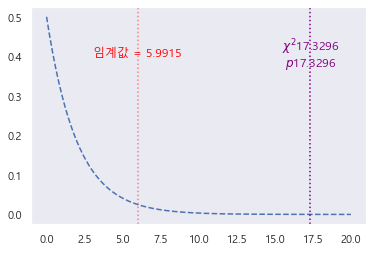

In [22]:
## 위 사례의 카이제곱분포 시각화
from scipy.stats import chi2
import numpy as np

from matplotlib import pyplot as plt

dof = 2 # 자유도
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)

# 유의수준 : 5%
x95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l, pdf_chi, 'b--')

# 95%의 임계값 표시
plt.axvline(x=x95_c, color='lightcoral', linestyle=':')
plt.text(x95_c, .4, '임계값 = ' + str(round(x95_c, 4)),
         horizontalalignment='center', color='red')

# 위에서 구한 카이분포 통계값 = result[0]
plt.axvline(x=result[0], color='purple', linestyle=':')
plt.text(result[0], .4, r'$\chi^2$' + str(round(result[0], 4)), va='bottom',
         horizontalalignment='center', color='purple')
plt.text(result[0], .4, r'$p$' + str(round(result[0], 4)), va='top',
         horizontalalignment='center', color='purple')
plt.grid()
plt.show()